<a href="https://colab.research.google.com/github/100054/Homework-PDS/blob/main/100054_EBabu_DSA8203_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
gh= pd.read_csv('https://github.com/100054/Homework-PDS/raw/main/infrastructure_gha.csv')

In [45]:
gh.sample(10)

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
683,Ghana,GHA,1977,Mobile cellular subscriptions,IT.CEL.SETS,0
499,Ghana,GHA,2004,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,6.652
1088,Ghana,GHA,2002,Revenue from all telecommunication services (c...,IT.TEL.REVN.CN,1015000000000
127,Ghana,GHA,2006,"Annual freshwater withdrawals, industry (% of ...",ER.H2O.FWIN.ZS,8.2987551867
333,Ghana,GHA,2013,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1100.79356316958
102,Ghana,GHA,1980,"Annual freshwater withdrawals, domestic (% of ...",ER.H2O.FWDM.ZS,28.1289506953
440,Ghana,GHA,2016,"Trademark applications, resident, by count",IP.TMK.RSCT,900
790,Ghana,GHA,1972,Fixed telephone subscriptions,IT.MLT.MAIN,23400
911,Ghana,GHA,2014,Secure Internet servers (per 1 million people),IT.NET.SECR.P6,5.24890484083086
570,Ghana,GHA,1980,"Air transport, passengers carried",IS.AIR.PSGR,279000


In [46]:
len(gh['Indicator Name'].unique())

57

In [47]:
gh.dtypes

Country Name      object
Country ISO3      object
Year              object
Indicator Name    object
Indicator Code    object
Value             object
dtype: object

**Cleaning the data**

In [48]:
#Changing data types
gh['Year'] = pd.to_numeric(gh['Year'], errors='coerce')
gh['Value'] = pd.to_numeric(gh['Value'], errors='coerce')

# Now you can safely convert the column to float
gh['Year'] = gh['Year'].astype(float)
gh['Value'] = gh['Value'].astype(float)
gh.dtypes

Country Name       object
Country ISO3       object
Year              float64
Indicator Name     object
Indicator Code     object
Value             float64
dtype: object

In [49]:
gh.columns

Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')

In [50]:
#Check null values
print(gh.isnull().sum())

Country Name      0
Country ISO3      0
Year              1
Indicator Name    0
Indicator Code    0
Value             1
dtype: int64


In [51]:
#Dropping null values
gh.dropna(subset=['Year', 'Value'], inplace=True)

In [52]:
print(gh.isnull().sum())

Country Name      0
Country ISO3      0
Year              0
Indicator Name    0
Indicator Code    0
Value             0
dtype: int64


**Exploratory Data Analysis**

              Year         Value
count  1255.000000  1.255000e+03
mean   1997.684462  4.005270e+09
std      14.930489  4.773319e+10
min    1960.000000  0.000000e+00
25%    1986.000000  2.536011e+00
50%    1999.000000  3.030000e+01
75%    2010.000000  1.666200e+04
max    2022.000000  1.015000e+12


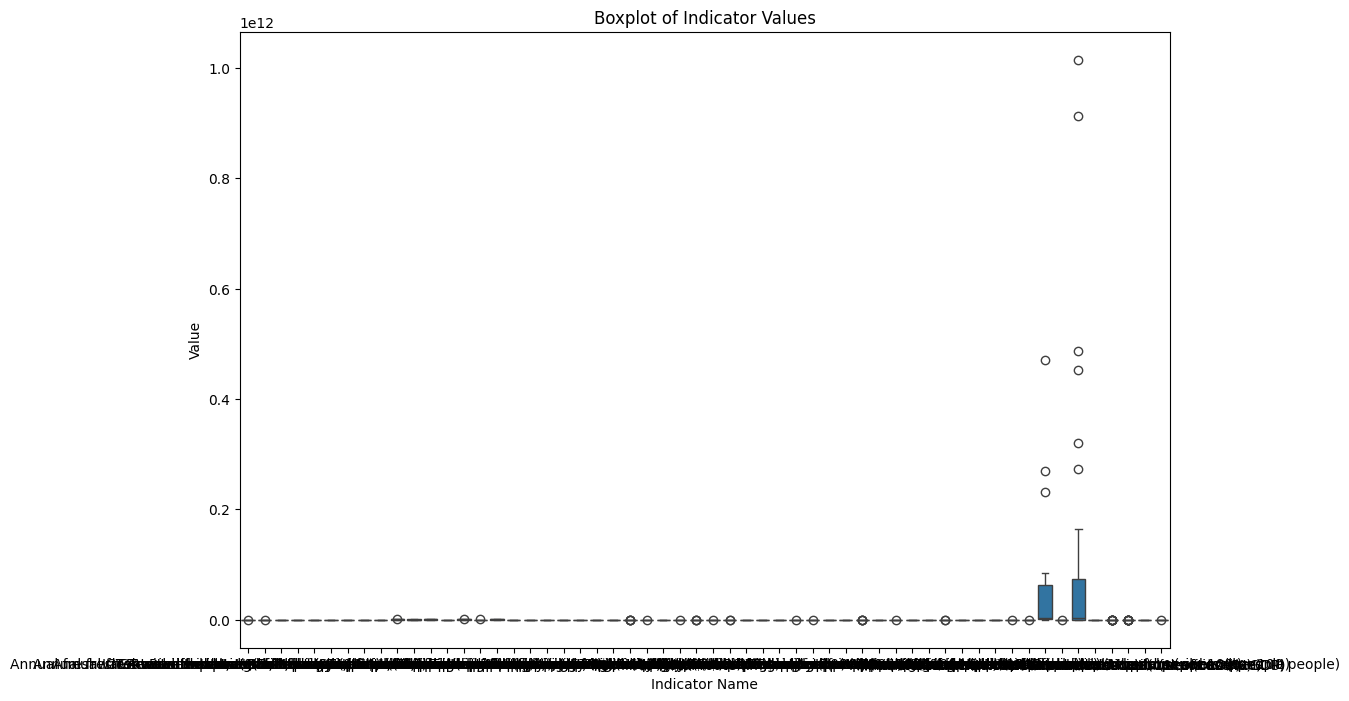

In [53]:
# Descriptive statistics
print(gh.describe())

# Boxplot for 'Value' by 'Indicator Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Indicator Name', y='Value', data=gh)
plt.title('Boxplot of Indicator Values')
plt.show()


**Visualization**

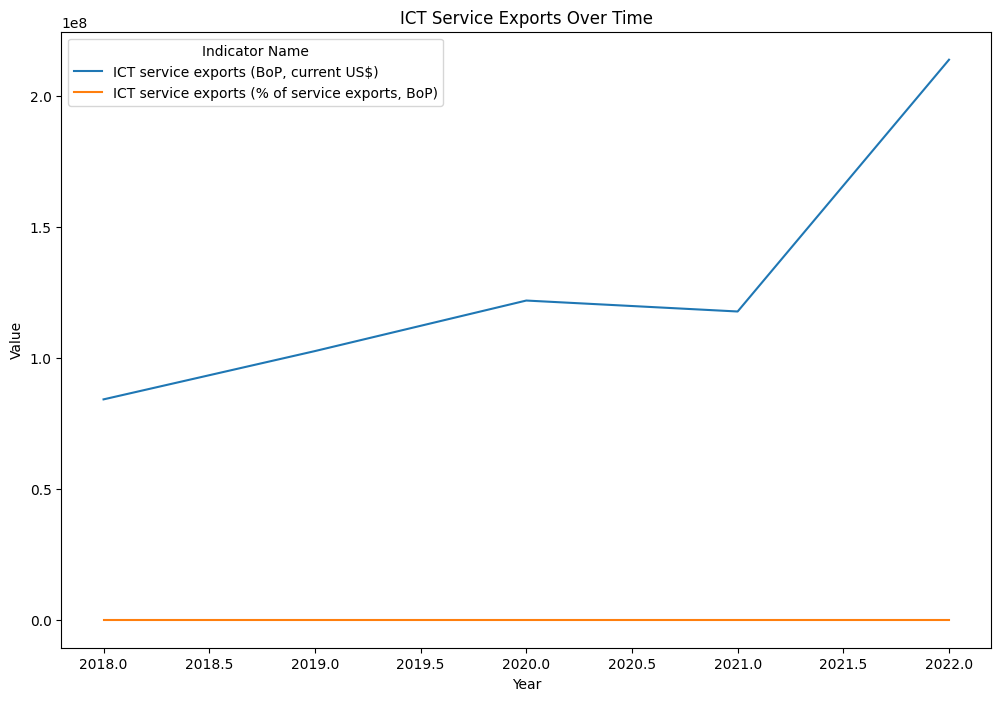

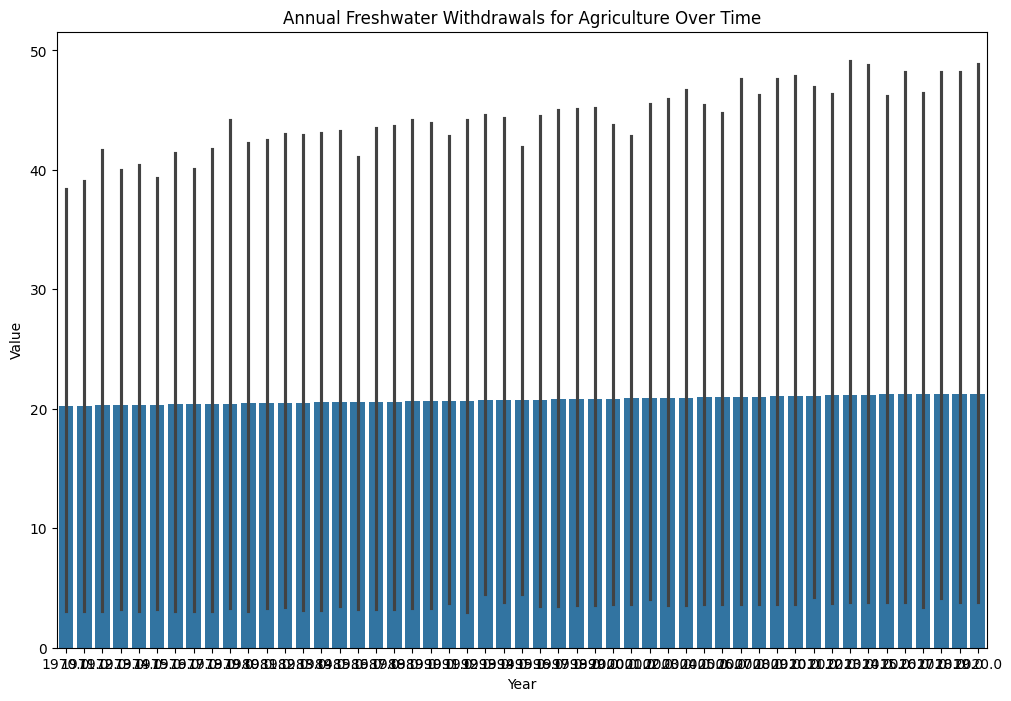

In [54]:
# Line plot for 'ICT service exports (BoP, current US$)'
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Value', hue='Indicator Name', data=gh[gh['Indicator Name'].str.contains('ICT service exports')])
plt.title('ICT Service Exports Over Time')
plt.show()

# Bar plot for 'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)'
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Value', data=gh[gh['Indicator Name'].str.contains('Annual freshwater withdrawals')])
plt.title('Annual Freshwater Withdrawals for Agriculture Over Time')
plt.show()


**Modelling**

**Time Series Forecasting with ARIMA**


Here's an example using the 'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)' indicator

<ipython-input-62-3a12a2444355>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gh_time_series['Year'] = pd.to_datetime(gh_time_series['Year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JA

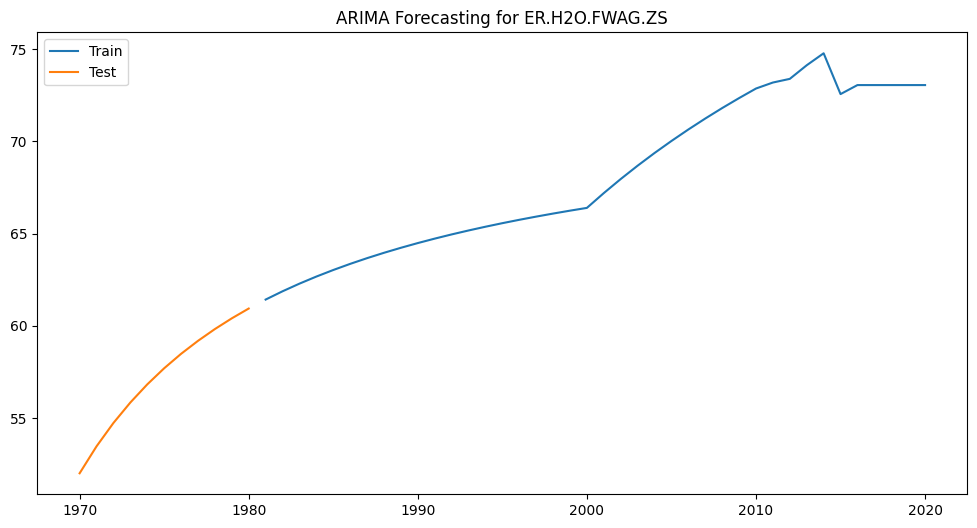

In [62]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def forecast_arima(gh, indicator_code, order=(5, 1, 0), test_size=0.2):
    # Filter data for the given indicator
    gh_time_series = gh[gh['Indicator Code'] == indicator_code]

    # Convert 'Year' to datetime
    gh_time_series['Year'] = pd.to_datetime(gh_time_series['Year'], format='%Y')

    # Set 'Year' as the index
    gh_time_series.set_index('Year', inplace=True)

    # Split into train and test sets
    train, test = train_test_split(gh_time_series['Value'], test_size=test_size, shuffle=False)

    # Fit ARIMA model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    #forecast, stderr, conf_int = model_fit.forecast(steps=len(test))

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    #plt.plot(test.index, forecast, label='Forecast', linestyle='dashed')
    plt.legend()
    plt.title(f'ARIMA Forecasting for {indicator_code}')
    plt.show()

    # Evaluate the model
    #mse = mean_squared_error(test, forecast)
    #print(f'Mean Squared Error for {indicator_code}: {mse}')

# Example usage for one indicator
forecast_arima(gh, 'ER.H2O.FWAG.ZS', order=(5, 1, 0), test_size=0.2)

# You can call the function with different indicator codes and parameters as needed.


**QUESTIONS**

1. What sort of issues are there in your data? What cleanup was required?
2. Create a function that accepts the raw data after it has been loaded and returns the cleaned-up data.
3. Highlight the top two or three visualizations that are relevant to your dataset.
4. Create a supervised or unsupervised learning model from the data in your dataset.
5. Summarize the insights gained and conclusions drawn (maximum three) from your dataset.
